# US Dollar Purchasing Power in East Asia
- by Deangelo Bowen, July 1, 2022

---

## Project Description : 
The United States Dollar has never been stronger. As of today, in 2022, the USD Index has soared to an all-time high. However, domestic goods are getting any cheaper. I will be analyzing how to take advantage of the strength of the US Dollar in certain foriegn countries for profit or personal gain. The currencies I will be showcasing against the US Dollar are currencies strictly in East Asia. These currencies are the Korean Won, Japanese Yen, Chinese Yuan, Hong Kong Dollar, Taiwanese Dollar, Singapore Dollar and the Thai Baht. 

---

## Project Overview:

The purpose of this project is to identify countries in East Asia where the U.S. Dollar has, or does not have significant purchasing power. 

To fully understand the observation, when going through this notebook, understand that each currency is compared to their own national price. This, for example, means that 1 USD or dollar bill is national recognized of value as 1 dollar. 100 Yen would then be the national equivalent of the USD for Japan.

##### This national equivalent should not be confused with the global exchange rate. 

National Equivalent Prices comparable to 1 USD are as follows:
- 100 Japanese Yen
- 10 Chinese Yuan/Renminbi
- 10 HKD
- 1000 Korean Won
- 1 Singapore Dollar
- 30 Taiwanese Dollar
- 30 Thai Baht

_The information backing these calculations are assumptions of an exchange rate where the respective national equivalent of $1 per country observed equal exchange rates. The research done behind these calculations can be found here:_
- [Korean Won](https://wise.com/us/currency-converter/krw-to-usd-rate)
- [Hong Kong Dollar](https://www.scmp.com/yp/discover/advice/article/3093224/what-hong-kong-us-dollar-peg-and-how-does-it-work)
- [Singapore Dollar](https://themoneyconverter.com/USD/SGD)
- [Chinese Yuan/Renminbi](https://www.cnn.com/2021/12/09/investing/china-yuan-2021-mic-intl-hnk/index.html)
- [Thai Baht](https://www.exchangerates.org.uk/USD-THB-exchange-rate-history.html)
- [Japanese Yen](https://www.bloomberg.com/news/articles/2022-06-10/why-the-yen-is-so-weak-and-what-that-means-for-japan-quicktake)

---

## Objectives :

- To conduct a Time Series Analysis observing EA Currencies vs. USD over time
- To make an informed decision based on the Analysis and showcase the current best country where the USD has more value. 
- To give recommendations on potential times to invest the USD into  the final observed country. This observation is aimed to assist potential:
    - Travelers/Backpackers
    - Goods Import/Export Businesses
    - International Shopping Enthusiasts
    - International Investing Enthusiasts (real estate, foriegn rarities, etc)
- Showcase code and techniques used for reproducable analysis to stay up-to-date in relevant data.

---

## Project Summary: 

When conducting research on the US dollar purchasing power in East Asian countries, and creating an indepth analysis on which countries as of July 2022 would be the best to expend that purchasing power, I discovered that Japan and Korea were the strongest targets, while China and Hong Kong were the weakest. 

With Chinese Yuan/Renminbi and Chinese affiliated countries such as Taiwan or Hong Kong, the USD is stagnant in negative purchasing power. This ranges from around (-17%) to (-35%)

In countries such as Singapore, Japan and Korea, the US Dollar purchasing power is continously fluctuating and very volatile, however it has alwas had a consistant positive purchasing power of about 5-35%. 

My recommendations for those who are either traveling, purchasing lands or making investments in goods, or simply looking to buy enthusiast related items from foreign countries, would be to target Japan and Korea as of July, 2022. 

---

## Data Dictionary
|Column | Description | Dtype|
|--------- | --------- | ----------- |
|DATE| date of observation| datetime|
|JPYEN| actual japanese yen price| float64|
|HKD| actual hong kong dollar price| float64|
|CHYUAN| actual chinese yuan/renminbi price| float64|
|KRWON| actual korean won price| float64|
|SPD| actual singapore dollar price| float64|
|TWD| actual taiwan dollar price| float64|
|THB| actual thai baht price| float64|
|USD_Index|actual usd index price|float64|
|USD_Actual| usd national equivalant price|int64|
|month| actual month |datetime|
|USD_YEN| purchase power percent for USD to YEN| float64|
|USD_HKD|purchase power percent for USD to HKD|float64|
|USD_YUAN| Purchase power percent for USD to Yuan|float64|
|USD_WON| purchase power percent for USD to Won|float64|
|USD_SPD| purchase power percent for USD to SPD| float64|
|USD_TWD| purchase power percent for USD to TWD|float64|
|USD_THB| purchase power percent for USD to thai baht |float64|

---

## Imports : 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

from itertools import combinations

from datetime import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt

import wrangle as w
import explore as e

---

## Preparation: 

To acquire the data on the currencies I took to [FRED](https://fred.stlouisfed.org), searched for specific countries and obtained their csv's. There was 1 csv per currency so, I merged and cleaned up the database to create a dataframe that was appropriate for the observation. 

Lucily all of the data started in 2017 and ended on the same day. This meant that there were little nulls and completely even data. Transitioning from CSVs to merged dataframe came at little to no complications.

#### I started with acquiring the data.

In [2]:
# acquires and cleans data. Function found in wrangle.py
df = w.acquire_data()

After acquisition, I realized that I needed to gather more information. This information would be the percentage gained or loss in purchase power from the USD to a specific country. As highlighted above, there was simple mathematical calculations that needed to be done which returned more than adequate results. 

In [3]:
# remove nulls
df.dropna()

,JPYEN,HKD,CHYUAN,KRWON,SPD,TWD,THB,USD_Index,USD_Actual,month
DATE,,,,,,,,,,
2017-06-26,111.48,7.7986,6.8382,1132.48,1.3875,30.30,33.97,112.7623,1.0,06-Jun
2017-06-27,112.42,7.7999,6.8100,1137.77,1.3867,30.32,33.94,112.5494,1.0,06-Jun
2017-06-28,112.18,7.8030,6.7984,1141.91,1.3818,30.41,33.95,112.0744,1.0,06-Jun
2017-06-29,112.32,7.8038,6.7840,1144.07,1.3799,30.46,33.98,111.9981,1.0,06-Jun
2017-06-30,112.40,7.8055,6.7793,1143.75,1.3765,30.38,33.92,111.9897,1.0,06-Jun
...,...,...,...,...,...,...,...,...,...,...
2022-06-17,135.14,7.8498,6.7160,1287.36,1.3896,29.73,35.25,121.3486,1.0,06-Jun
2022-06-21,136.25,7.8498,6.6880,1293.25,1.3849,29.71,35.33,120.7491,1.0,06-Jun
2022-06-22,136.05,7.8499,6.6983,1297.21,1.3872,29.81,35.34,120.6333,1.0,06-Jun


#### Getting those percentages were wrapped in a simple function.

In [4]:
# mathematical calculations to set percent gained or loss from conversion
e.set_percentages(df)

#### Finally the data was split into a 70%/30% train/test for the analysis.

In [5]:
train, test = e.split_data(df)

#### Now, a quick glance at the dataframe

In [6]:
train.head()

,JPYEN,HKD,CHYUAN,KRWON,SPD,TWD,THB,USD_Index,USD_Actual,month,USD_YEN,USD_HKD,USD_YUAN,USD_WON,USD_SPD,USD_TWD,USD_THB
DATE,,,,,,,,,,,,,,,,,
2017-06-26,111.48,7.7986,6.8382,1132.48,1.3875,30.30,33.97,112.7623,1.0,06-Jun,11.48,-22.014,-31.618,11.3248,38.75,3.0,3.97
2017-06-27,112.42,7.7999,6.8100,1137.77,1.3867,30.32,33.94,112.5494,1.0,06-Jun,12.42,-22.001,-31.900,11.3777,38.67,3.2,3.94
2017-06-28,112.18,7.8030,6.7984,1141.91,1.3818,30.41,33.95,112.0744,1.0,06-Jun,12.18,-21.970,-32.016,11.4191,38.18,4.1,3.95
2017-06-29,112.32,7.8038,6.7840,1144.07,1.3799,30.46,33.98,111.9981,1.0,06-Jun,12.32,-21.962,-32.160,11.4407,37.99,4.6,3.98
2017-06-30,112.40,7.8055,6.7793,1143.75,1.3765,30.38,33.92,111.9897,1.0,06-Jun,12.40,-21.945,-32.207,11.4375,37.65,3.8,3.92


---

## Exploration:

# Visualizing the Train/Test split

To start the exploration, I visualized exactly where my test/train split cut off. 

What was observed is that from 2021 and after would be where the train data is on, and anything before would be the test data. 

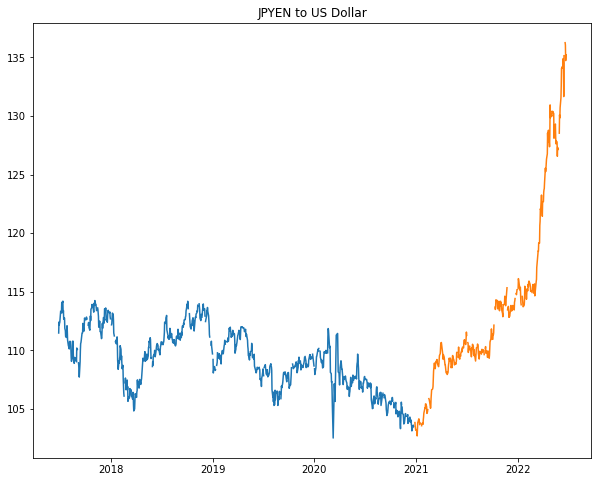

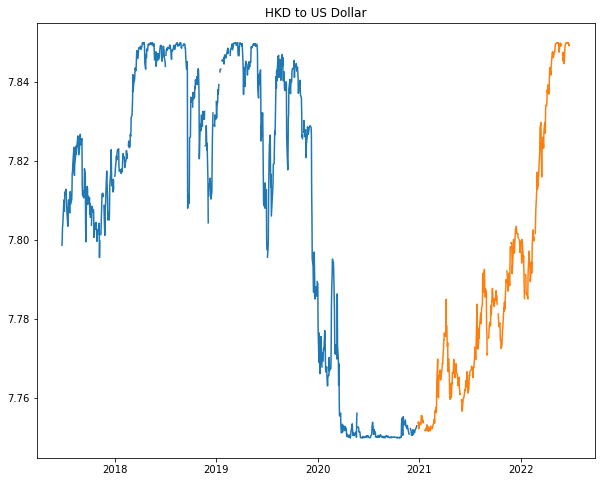

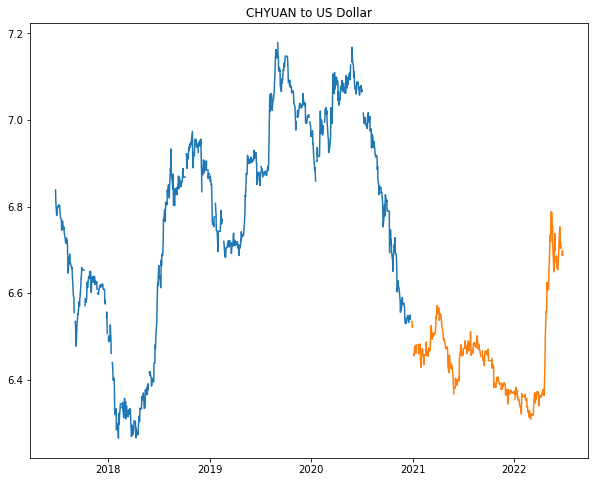

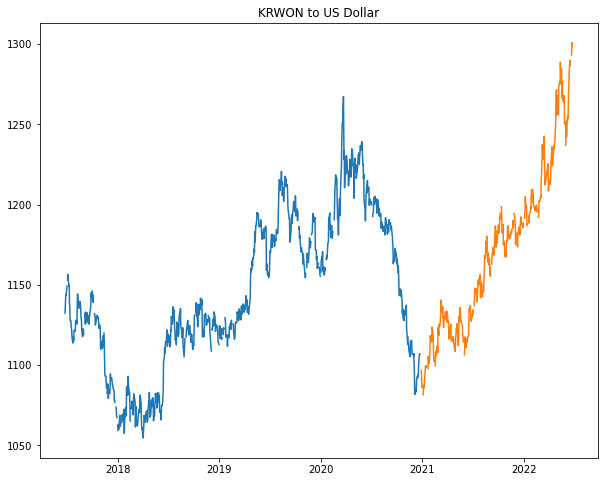

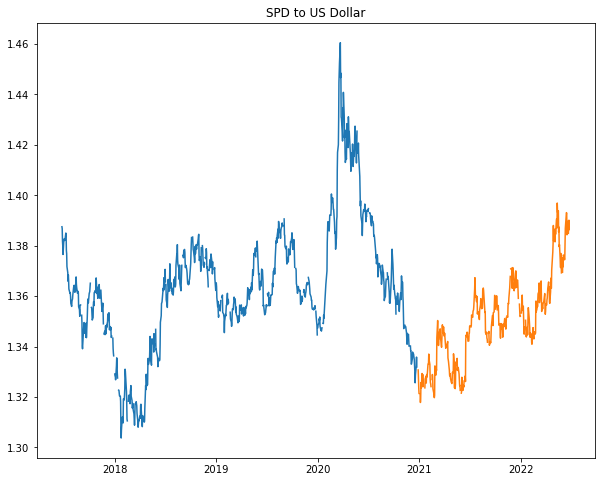

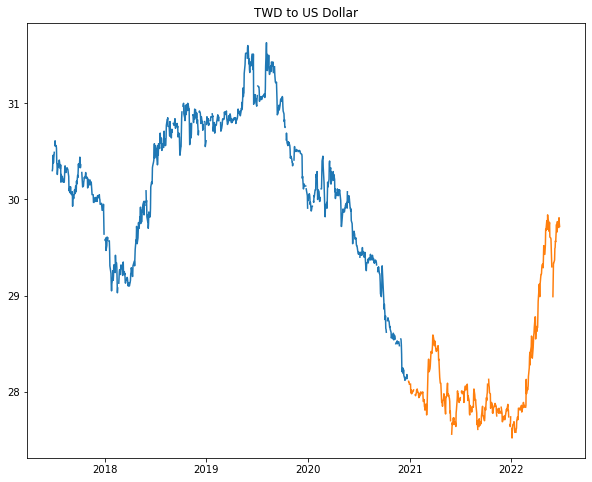

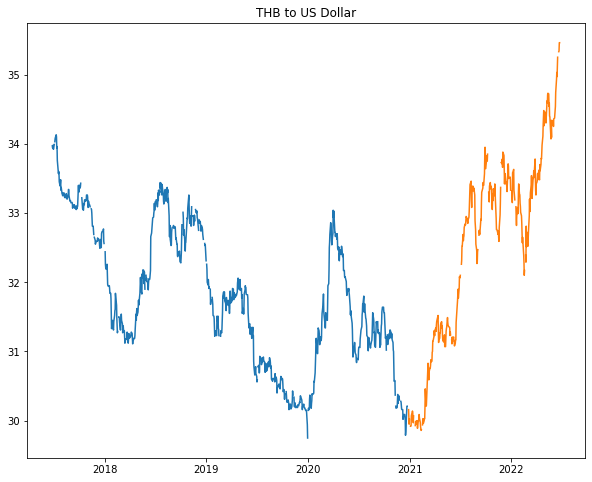

In [7]:
e.visualize_splits(train, test)

### Takeaways: 
Almost immediately I was able to identify that there are many factors that influence the fluctuation of currency prices after the year 2021. I decided that these would unfortunately not be covered in this notebook, but perhaps observed as an additional at a later date.

---

# Visualizing Change Over Time

#### From here, I will only be working on the Train dataset.

#### Observing only the Train dataset, I wanted to take a look at the change over time in currency price in percentage vs the USD for each currency. 

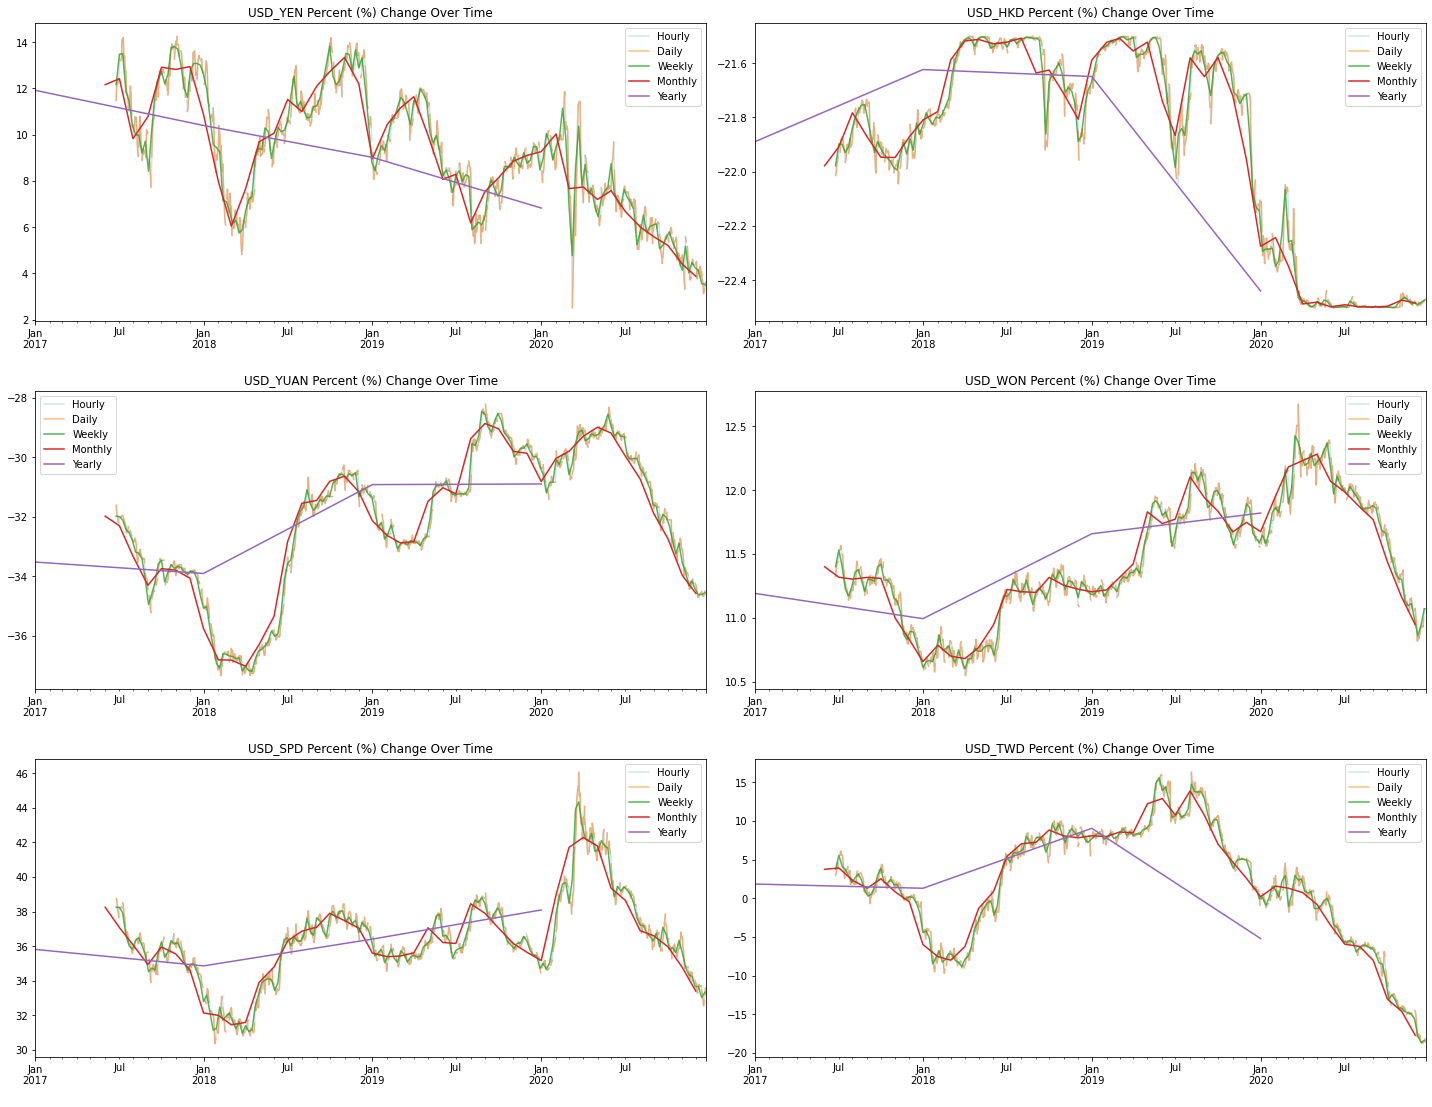

In [8]:
e.plot_cot(train)

### Takeaways:
The Chinese Yuan, Hong Kong Dollar, and Taiwan Dollar are all showing negative percentages with exception of 2019 USD to Taiwan. This indicates that upon switching currencies, instead of getting 10 Chinese Yuan, for example, at the end of the year 2021, we'd be getting about 34% less than that (~6.7 Yuan per usd). 

Overall, it looks as though each of these currencies were starting to gain some momentum against the USD in the early stages of 2021, as the Japanese Yen went from 14% to 4%, Korean Won from a high of 12.5% to 10%, and the Singapore Dollar from a high of 46% to 34%. 

Next, I want to visualize the moving averages of each month from 2017-2021 in candlestick boxplots.

---

# Visualizing Actual Price Movement

By looking at each month from 2017-2021 average price and range, I may be able to identify a month where the currency isn't pushing against the US Dollar buying power on average. 

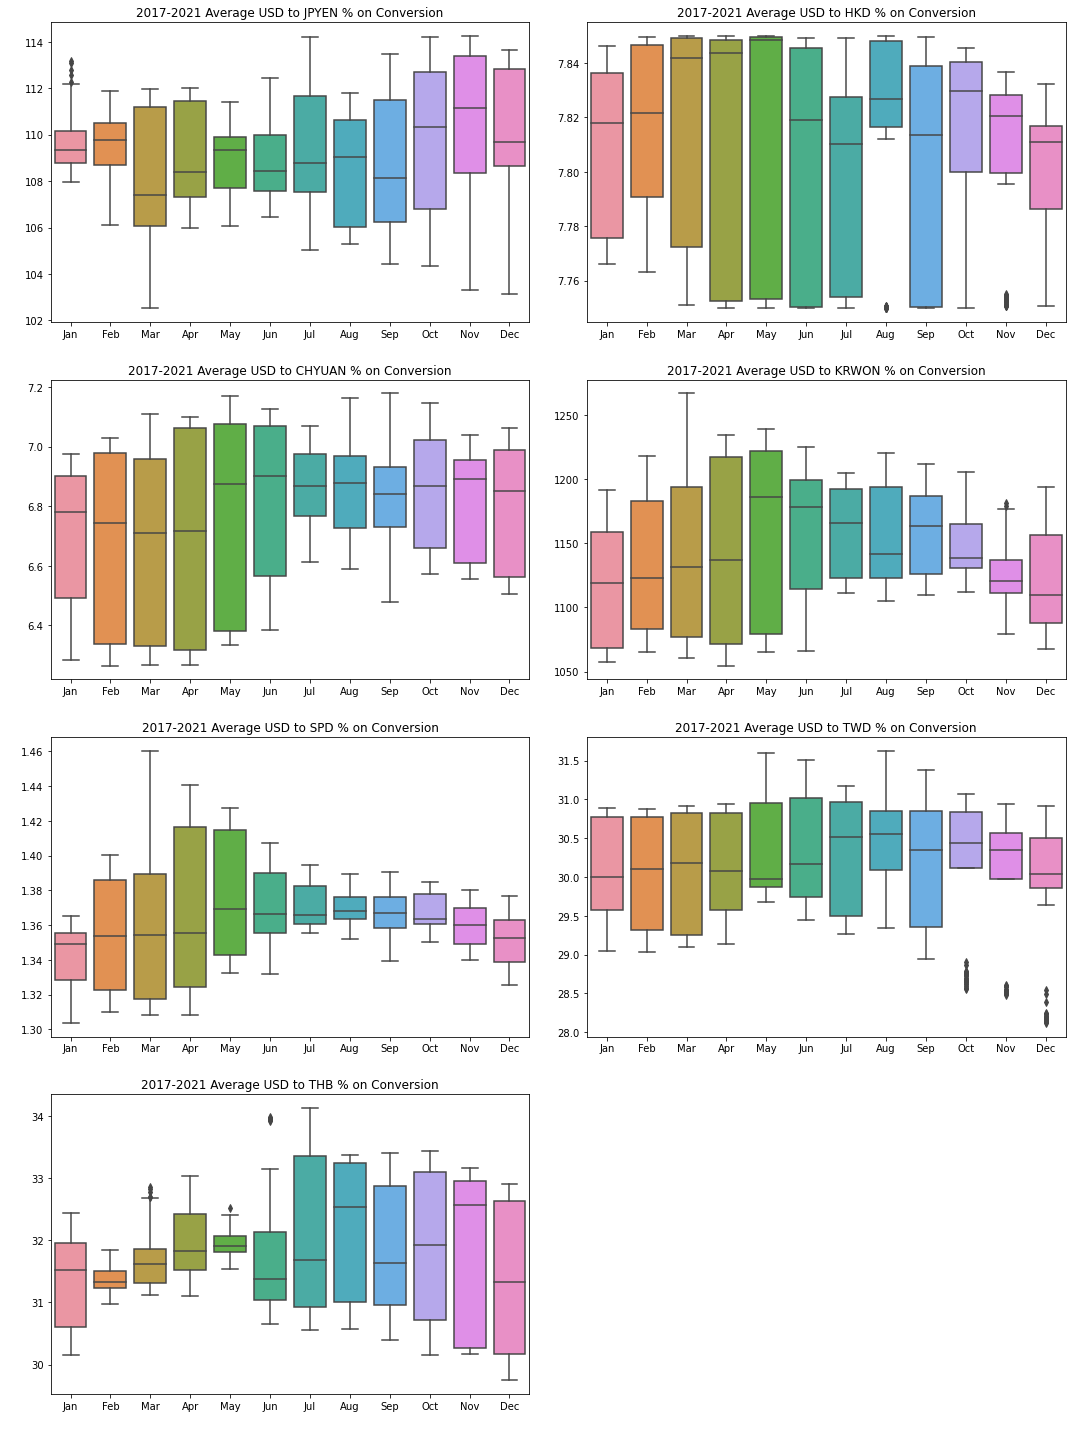

In [9]:
e.get_boxplots(train)

## Takeaways:
While countries in China still seem to have less flucuation in price, I can identify where there is strong flucuation in other countries. This would be in Korea, for example, where over the past 4 years (2017-2021) prices at the start of the year could have ranged between 1075 Won per USD to 1200 Won per USD. May, in this case, has the best median for USD to Won at about 1200 Won to 1 USD. 

Another case of this would be the Japanese Yen, where it seems to have the best prices for USD to Yen in November on average.

While looking at the years-by-months we can get a since of how the price has been and or flucuated in the past, but it doesn't display exactly how volatile the currency. For this, I will observe the volatility of each currency over the past few years.

---

# Visualizing Volatility 

By observing the volatility, I can identify which prices move faster overtime at what rate. This will allow more accurate recommendations in selecting which currency or currencies might either be steady and safe, or unpredictable and profitable (or else). 

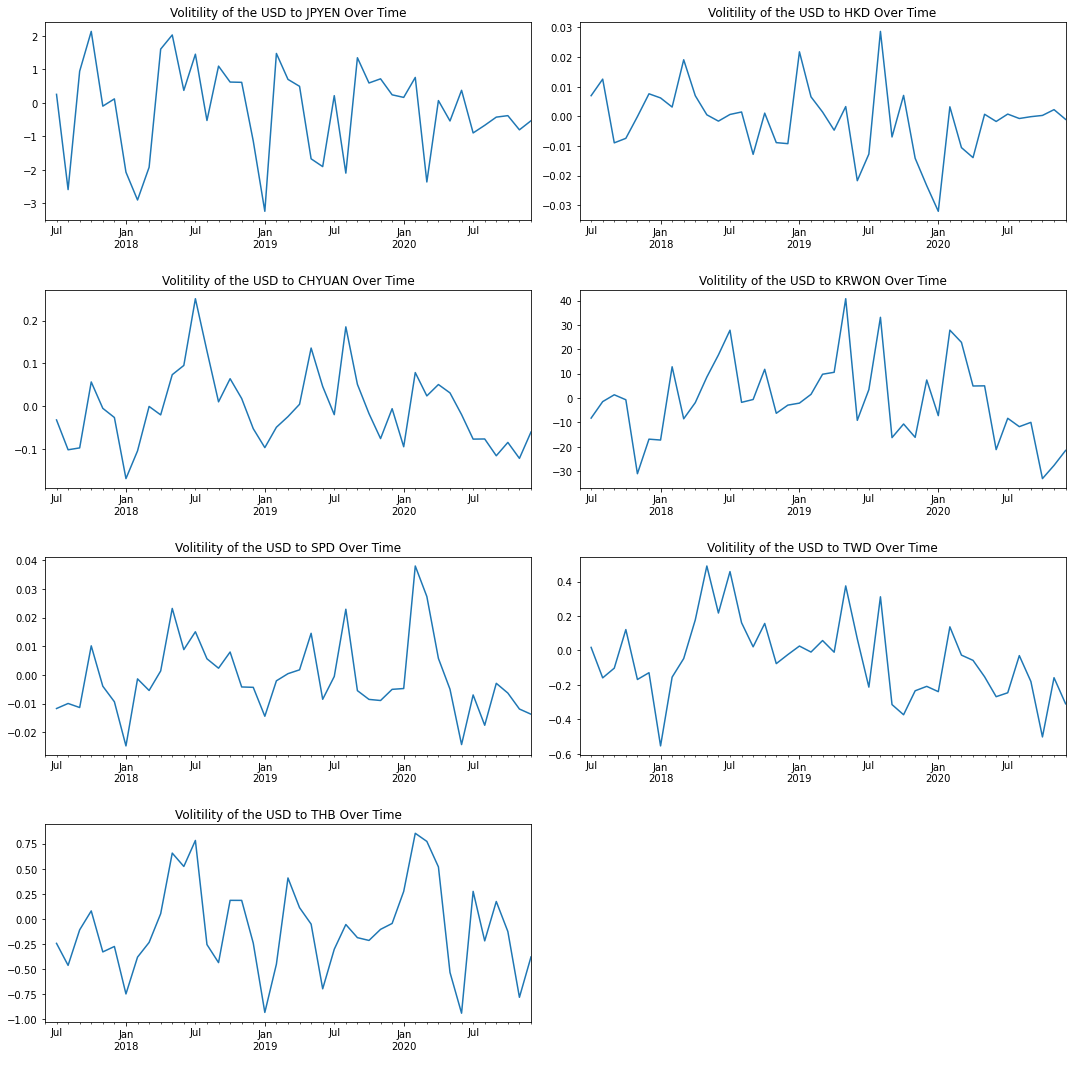

In [10]:
e.get_volatility(train)

## Takeaways:
Although the charts might look somewhat messy visually, drawing comparisons to the y-axis ticks between each plot gives complete understanding of what the volatility is trying to convey. In the case of the Taiwan dollar, and others, I recognize that the volatility is measured by decimals. This indicates that these currencies aren't very volatile and are consistant in price over time. 

On the opposite end, the Japanese Yen and Korean Won are measured by 1's and both flucuate to positive and negative values of 1-3 on a consistant basis. This shows that they are by far the most volatile by comparison when vs the US dollar than these other currencies. 

But how can we predict this price movement? I identified that there are potentially some months where the prices were better in certain countries on average, but does that make it seasonal? To answer this, I will be using an Autocorrelation plot to check each currency for seasonailty. 

---

# Visualizing Seasonality

By using an autocorrelation plot, I am able to check for seaonailty. This means that I can discover if there are any potential specific trends in movements and price of the data at certain times.

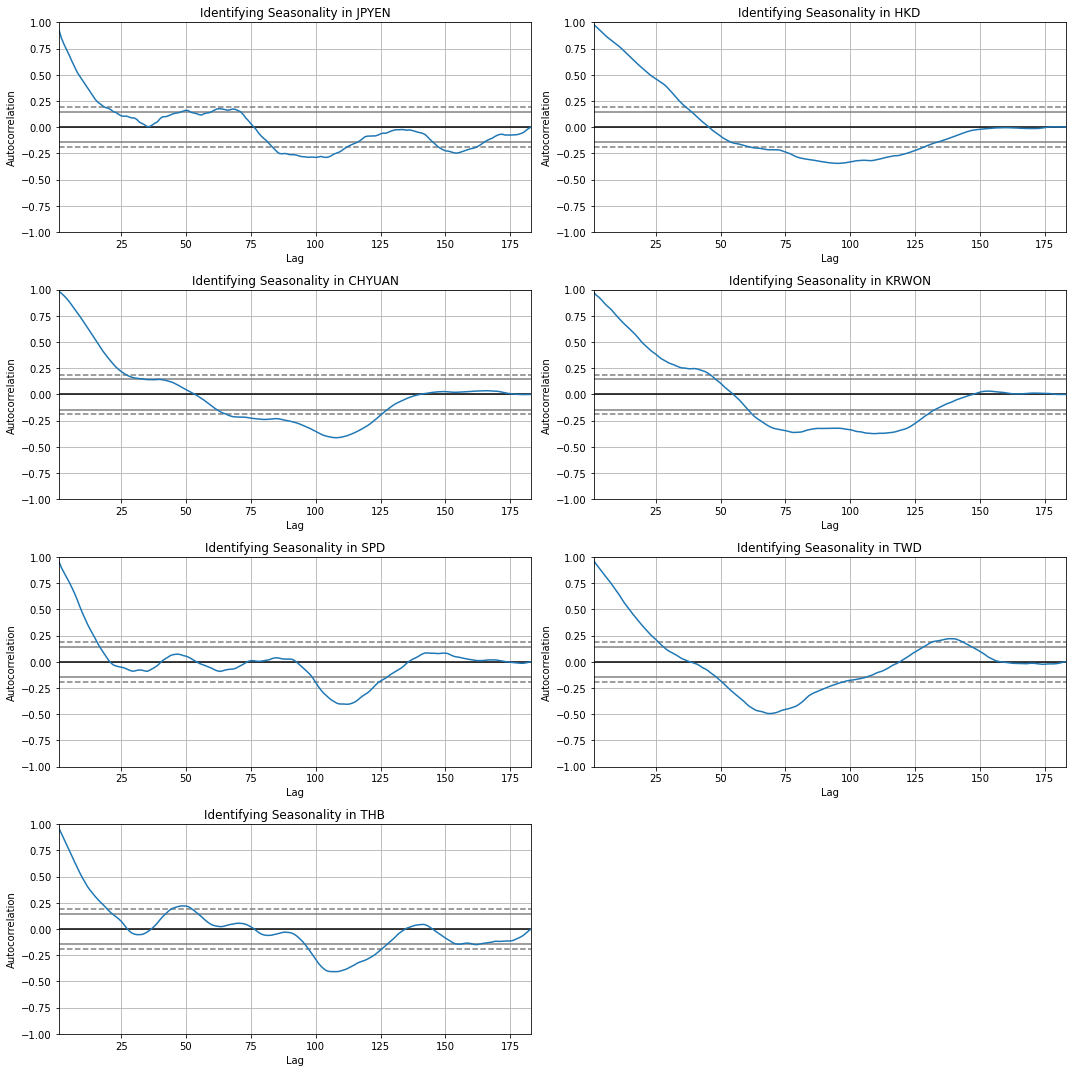

In [11]:
e.get_autocorrelation(train)

## Takeaways:
Although there are some points in the autocorrelation plots that display a possible hint of seasonality, there is not a trend.

---

### Exploration Takeaway Summary:

- Almost immediately I was able to identify that there are many factors that influence the fluctuation of currency prices after the year 2021. I decided that these would unfortunately not be covered in this notebook, but perhaps observed as an additional at a later date.
- Overall, it looks as though each of these currencies were starting to gain some momentum against the USD in the early stages of 2021, as the Japanese Yen went from 14% to 4%, Korean Won from a high of 12.5% to 10%, and the Singapore Dollar from a high of 46% to 34%. 
- Chinese and China affiliated countries are all strong against the US Dollar.
- The Japanese Yen and Korean Won have the best prices for USD to Yen/Won on average.
- Japanese Yen and Korean Won are by far the most volatile by comparison when vs the US dollar than these other currencies. 
- Although there are some points in an autocorrelation plots that display a possible hint of seasonality, there is not a trend, thus there is no identifiable seasonailty. 

---

## The MVP 

Since the overall goal of this project was to identify the best currencies/countries to convert the US Dollar to to get more for that dollar, I've identified that there is no one right answer. However, the observation is successful and I have been able to compile a list of the best and worst countries to use the US Dollar in East Asia.

### The Worst as of 2021:
- #### China by way of Chinese Yuan/Renminbi
    - As of 2021 near 33% less than the ideal 1:10 USD:Yuan rate. 
    - However, it is less volatile than any other currency. 
- #### Hong Kong by way of the Hong Kong Dollar
    - As of 2021, nearly 22% less than the ideal 1:10 USD:HKD rate. 
    - Slighly more volatile than the Chinese Yuan. 

### The Best as of 2021:
- #### Japan by way of the Japanese Yen
    - On average getting 10% more than the ideal 1:100 USD:YEN. 
    - However, extremely volatile. 
- #### Korean Won
    - Also on average 10-15% as of 2021 than the ideal 1:1000 USD:WON
    - Also extremely volatile, but less volatile than the Yen. 

---

## Modeling the MVP

I will be modeling on the best as of 2021's Japanese Yen. This is because as seen in the plot below, the Japanese Yen as of 2022 to current date is the best rate for USD to Yen at about 35%

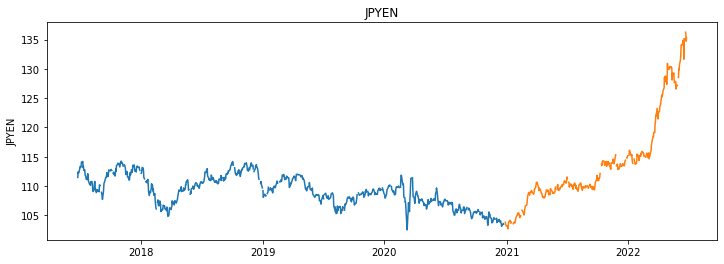

In [12]:
for col in train.columns[:1]:
    plt.figure(figsize=(12,4))
    plt.plot(train[col])
    plt.plot(test[col])
    plt.ylabel(col)
    plt.title(col)
    plt.show()

Based on the data, 1 USD goes for 135 YEN. With the ideal being a 1 for 1 of 1:100 USD:Yen, the data shows that the USD is growing in purchase power in Japan as of now. 

In an attempt to predict price based on the average movement weight of the Japanese Yen to USD I will construct a model.

In [13]:
# Create the empty dataframe
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])

In [14]:
# create a dataframe with the average movement of the Japanese Yen
# from the train dataset (2017-2021)

yen = round(train['JPYEN'].mean(),2)
yen_percent = round(train['USD_YEN'].mean(),2)

yhat_df = pd.DataFrame({'JPYEN':[yen],
                        'usd_percent':[yen_percent]}, index=test.index)

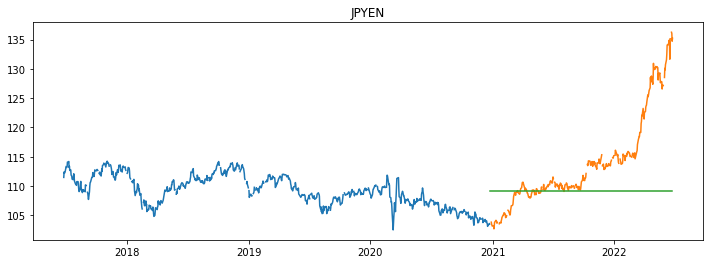

In [20]:
# Plot actual vs predicted
plt.figure(figsize = (12,4))
plt.plot(train[col])
plt.plot(test[col])
plt.plot(yhat_df[col])
plt.title(col)
plt.show()

## Takeaways:
- While the model's prediciton is relevant in the data from 2017-2021, it currently isn't effective on predicting future data, or more specifically, the 2022 data. 
- I believe this to be of reasons outside of average price movement, due to political and economical variables. However, they will not be touched upon at this time in this project. 

# In conclusion : 


When observing currencies against one another it's best to identify exactly what a National equivalent of one currency is to another. For this I took the USD and the national equivalent amount of currencies in East Asia, disregarding the current exchange rate. 

What I discovered was exactly how much more or less those utilizing the US Dollar would be receiving when purchasing foriegn goods, services, or making investments. 

With Chinese Yuan/Renminbi and Chinese affiliated countries such as Taiwan or Hong Kong, the USD is stagnant in negative purchasing power. This ranges from around (-17%) to (-35%)

In countries such as Singapore, Japan and Korea, the US Dollar purchasing power is continously flucuating and very volatile, however it has alwas had a consistant positive purchasing power of about 5-35%. 

### My Recommendations: 

My recommendations for those who are either traveling, purchasing lands or making investments in goods, or simply looking to buy enthusiast related items from foreign countries, would be to target Japan and Korea as of July, 2022. 

The USD to Yen is yielding over 35% more per USD than the standard ratio of 1:100 yen. Simply put, expect an immediate +30% return on investment when calculating with national equivalency. 

### With more time :

I wish to identify the causes of the massive shift in the declining of certain national currencies after 2021. 

Recent geo-political and economic events give assumptions for influence , however this venture would take another report or two to fully expand on the what, how, and why. 

# End